In [35]:
import matplotlib as mpl
import pylab

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

In [39]:
%matplotlib inline
pylab.rcParams['figure.figsize'] = (16.0, 10.0)

In [4]:
results = pd.read_csv("/home/matt/Datasets/Battelle Data/data-extracted/testing_results.csv")

In [5]:
results = results[results.kernels=='laplace']

In [6]:
results.drop('kernels',axis=1,inplace=True)

In [7]:
results = results.set_index(['gammas','metrics']).stack().unstack(level=0)

In [8]:
results.head()

gammas          30        40        50        60        70        80   \
metrics                                                                 
AUC     0  0.976583  0.921320  0.955139  0.931545  0.966594  0.940531   
        1  0.945785  0.962310  0.948936  0.918298  0.942671  0.975008   
        2  0.947894  0.934084  0.937103  0.950077  0.942222  0.950911   
        3  0.925256  0.946516  0.962072  0.943819  0.955981  0.933540   
        4  0.935208  0.939619  0.945215  0.947139  0.943039  0.946085   

gammas          90        100       110       120    ...          230  \
metrics                                              ...                
AUC     0  0.934665  0.949947  0.947296  0.963594    ...     0.929991   
        1  0.949968  0.954306  0.964906  0.962795    ...     0.950078   
        2  0.966031  0.962454  0.943958  0.961863    ...     0.952192   
        3  0.950893  0.960243  0.929249  0.947254    ...     0.924254   
        4  0.939523  0.963872  0.954306  0.919345    ...     0.949907   

gammas          240       250       260       270       280       290  \
metrics                                                                 
AUC     0  0.934149  0.927971  0.941964  0.920782  0.951644  0.942120   
        1  0.929028  0.918775  0.945312  0.919350  0.928645  0.926227   
        2  0.931280  0.907950  0.914596  0.909403  0.910861  0.908446   
        3  0.931939  0.926998  0.904002  0.929313  0.932431  0.940083   
        4  0.949675  0.905268  0.927500  0.921809  0.915548  0.941765   

gammas          300       310       320  
metrics                                  
AUC     0  0.919137  0.927124  0.921393  
        1  0.935910  0.900409  0.925112  
        2  0.929792  0.890206  0.931528  
        3  0.948958  0.911358  0.925427  
        4  0.908022  0.940779  0.939051  

[5 rows x 30 columns]

In [62]:
#precision = results[(results.metrics=='precision') & (results.kernels=='laplace')]
#recall = results[(results.metrics=='recall') & (results.kernels=='laplace')]
#f1 =  results[(results.metrics=='F1') & (results.kernels=='laplace')]

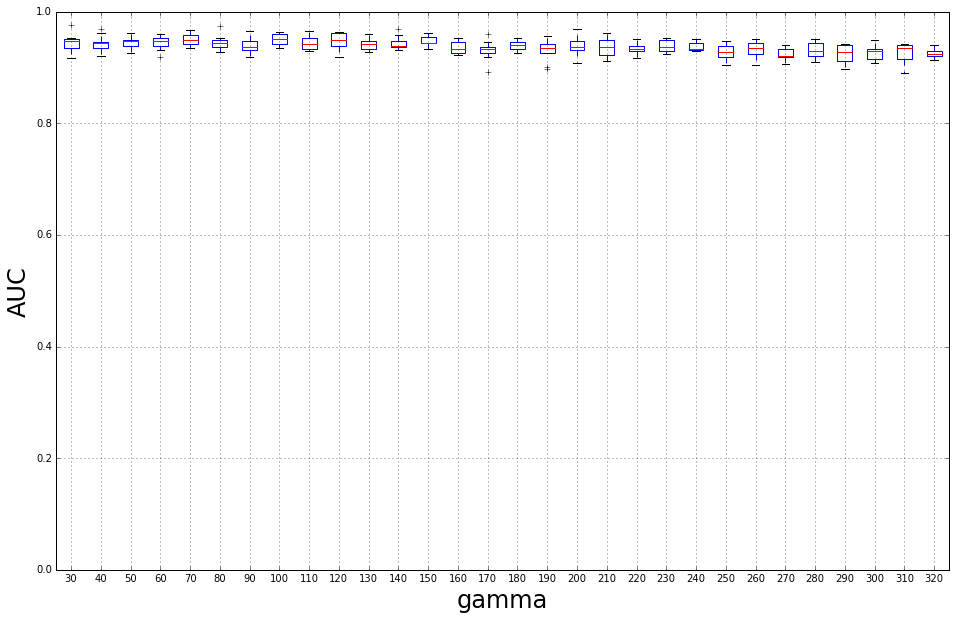

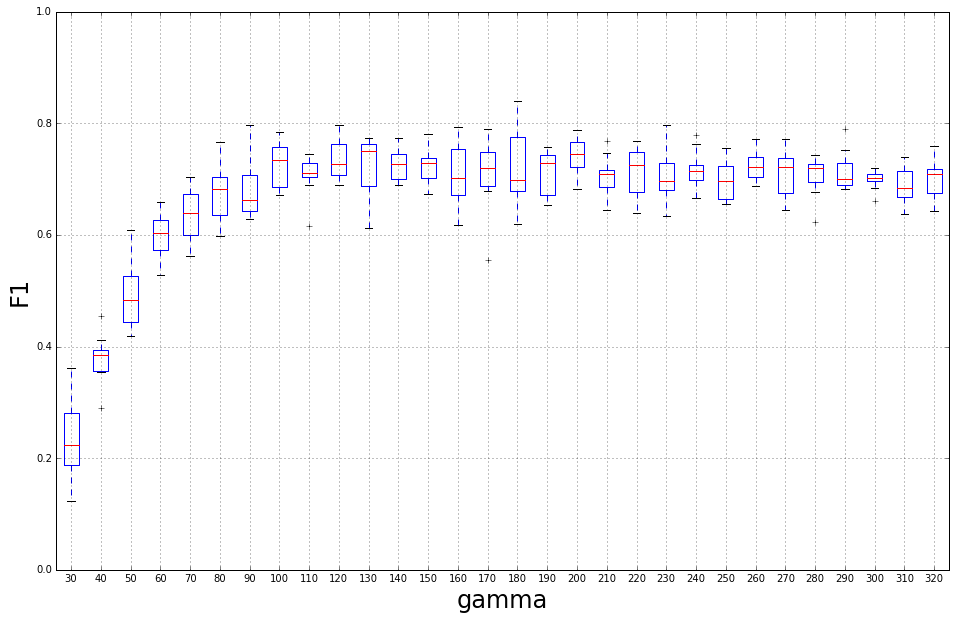

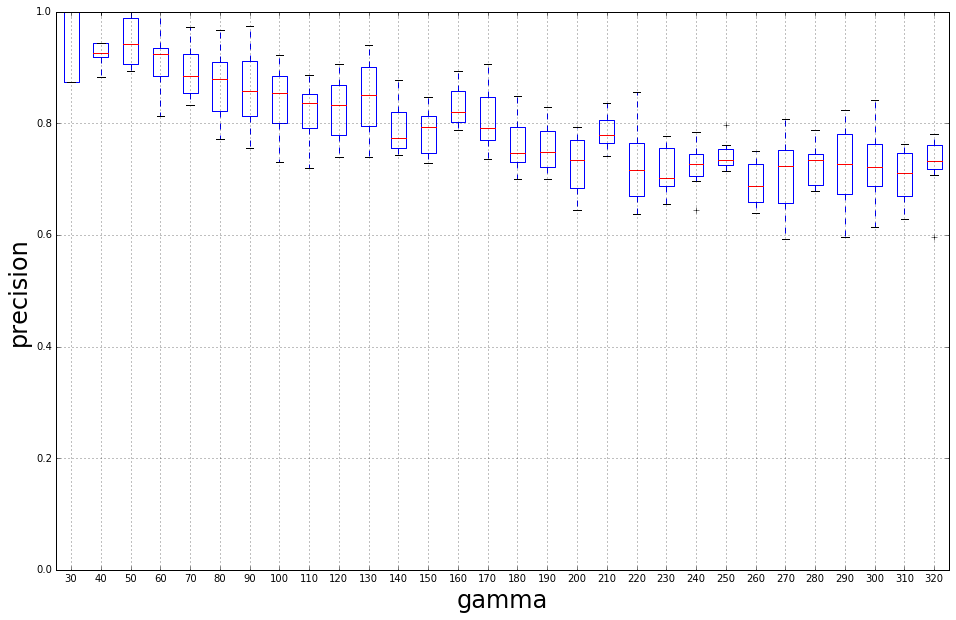

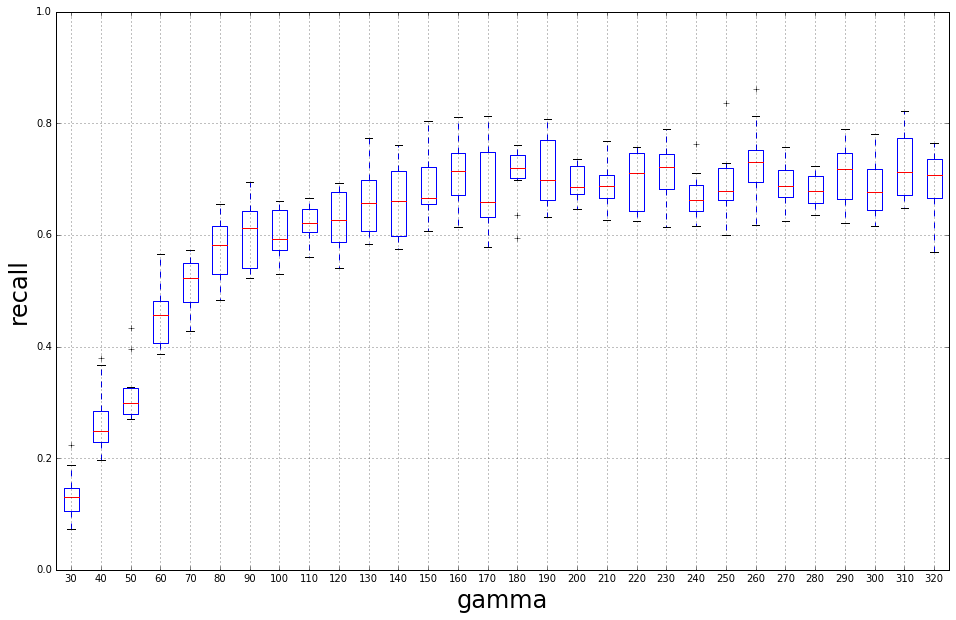

In [62]:
for metric in results.index.levels[0]:
    plot = results.loc[metric].plot(kind='box')
    plot.set_ylabel(metric,size=24)
    plot.set_xlabel("gamma",size=24)
    plot.set_ylim(bottom=0,top=1)
    plot.grid(True)
    fig = plot.get_figure()
    fig.savefig(metric+'.png',resolution=300)